<a href="https://colab.research.google.com/github/2303A51469/GENERATIVE-AI_2025/blob/main/2303A52431_WEEK_7_ASSIGNMENT_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question

1. (1 ponto) Design a multilayer ANN architecture according to the requirements shown below.
Train, test, save (.h5) and deploy the model to diagnose diabatic disease using the Keras deep
learning library

2. (1 ponto) Calculate training and testing accuracy, build confusion matrix, also calculate recall,
precision and F1-score.

3. (1 ponto) Build the application by loading the saved ANN model.
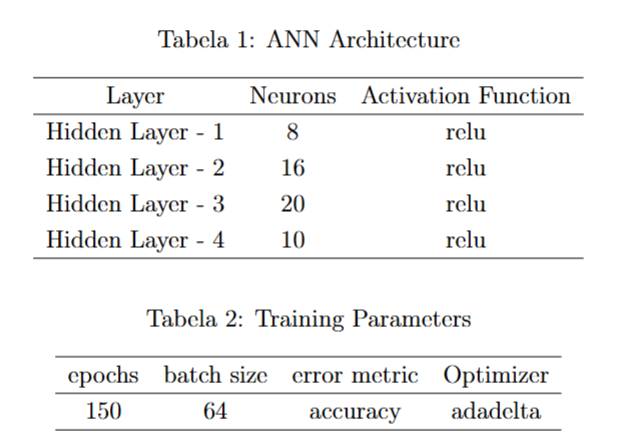

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adadelta
from sklearn.metrics import confusion_matrix, classification_report

X_train = np.random.rand(500, 10)
y_train = np.random.randint(0, 2, (500, 1))

X_test = np.random.rand(100, 10)
y_test = np.random.randint(0, 2, (100, 1))

model = Sequential([
    Dense(8, activation='relu', input_shape=(10,)),
    Dense(16, activation='relu'),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_test, y_test))

model.save("diabetes_model.h5")

train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

y_pred = (model.predict(X_test) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

loaded_model = keras.models.load_model("diabetes_model.h5")

new_data = np.random.rand(1, 10)
predicted_result = loaded_model.predict(new_data)

print("Predicted Disease (0: No, 1: Yes):", int(predicted_result[0][0] > 0.5))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.5067 - loss: 0.6955 - val_accuracy: 0.4300 - val_loss: 0.7047
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5033 - loss: 0.6962 - val_accuracy: 0.4300 - val_loss: 0.7047
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5320 - loss: 0.6920 - val_accuracy: 0.4300 - val_loss: 0.7047
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5203 - loss: 0.6933 - val_accuracy: 0.4300 - val_loss: 0.7047
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5201 - loss: 0.6911 - val_accuracy: 0.4300 - val_loss: 0.7047
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5341 - loss: 0.6914 - val_accuracy: 0.4300 - val_loss: 0.7047
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5368 - loss: 0.6916 - val_accuracy: 0.4300 - val_loss: 0.7047
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5244 - loss: 0.6922 - val_accuracy: 0.4300 - val_los

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5165 - loss: 0.6942 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3949 - loss: 0.7090 
Train Accuracy: 0.5199999809265137
Test Accuracy: 0.4300000071525574
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
 [[43  0]
 [57  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      1.00      0.60        43
           1       0.00      0.00      0.00        57

    accuracy                           0.43       100
   macro avg       0.21      0.50      0.30       100
weighted avg       0.18      0.43      0.26       100

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Disease (0: No, 1: Yes): 0
